-- firstname lastname --

# Use physical characteristics to determine wine quality

 <b>The deadline for the assignment is 11/01/2021</b>.


## The dataset

You are asked to predict wine quality, based on its physical characteristics. The dataset is provided in the accompanying file 'winequality-white.csv'. A full description of the data set can be found in the file 'metadata.txt'.

The data set can be loaded using following commands (make sure to put the dataset in your iPython notebook directory):

In [33]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

#read and randomly shuffle data
winequality = pd.read_csv('winequality-white.csv', sep=';')
features = winequality.columns[1:]
winequality = winequality.values
winequality = winequality[np.random.permutation(winequality.shape[0]),:]

#80% - 20% split for the training and testing sets
tr_set_size = int(len(winequality)*0.8)

#assign train and test sets (in your experiments, you want to do cross-validation)
X_tr = winequality[0:tr_set_size,:11]
y_tr = winequality[0:tr_set_size,11]
X_test = winequality[tr_set_size:,:11]
y_test = winequality[tr_set_size:,11]

## Minimum Requirements

You will need to train at least 2 different models on the data set. Make sure to include the reason for your choice (e.g., for dealing with categorical features).

* Train at least 2 models (e.g. decision trees and nearest neighbour) to predict the quality of the wine. You are allowed to use: Decision Trees, Perceptrons, Neural Networks, K Nearest Neighbours or Naive Bayes models (all of these are available in scikit learn library). You are also allowed to use other methods, as long as you motivate your choice.
* For each model, optimize the model parameters settings (tree depth, hidden nodes/decay, number of neighbours,...). Show which parameter setting gives the best expected error.
* Compare the best parameter settings for both models and estimate their errors on unseen data. Can you show that one of the models performs better?

All results, plots and code should be handed in as an interactive <a href='http://ipython.org/notebook.html'>iPython notebook</a>. Simply providing code and plots does not suffice, you are expected to accompany each technical section by explanations and discussions on your choices/results/observation/etc. <b>The deadline for the assignment is 11/01/2021</b>.

## Optional Extensions

You are encouraged to try and see if you can further improve on the models you obtained above. This is not necessary to obtain a good grade on the assignment, but any extensions on the minimum requirements will count for extra credit. Some suggested possibilities to extend your approach are:

* Build and host an API for your best performing model. You can create a API using pyhton frameworks such as FastAPI, Flask, ... You can host een API for free on Heroku, using your student credit on Azure, ...
* Try to combine multiple models. Ensemble and boosting methods try to combine the predictions of many, simple models. This typically works best with models that make different errors. Scikit-learn has some support for this, <a href="http://scikit-learn.org/stable/modules/ensemble.html">see here</a>. You can also try to combine the predictions of multiple models manually, i.e. train multiple models and average their predictions
* You can always investigate whether all features are necessary to produce a good model. Feel free to lookup additional resources and papers to find more information, see e.g <a href='https://scikit-learn.org/stable/modules/feature_selection.html'> here </a> for the feature selection module provided by scikit-learn library.

## Additional Remarks

* Depending on the model used, you may want to <a href='http://scikit-learn.org/stable/modules/preprocessing.html'>scale</a> or <a href='https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features'>encode</a> your (categorical) features X and/or outputs y
* Refer to the <a href='http://scipy.org/docs.html'>SciPy</a> and <a href='http://scikit-learn.org/stable/documentation.html'>Scikit learn</a> documentations for more information on classifiers and data handling.
* You are allowed to use additional libraries, but provide references for these.
* The assignment is **individual**. All results should be your own. Plagiarism will not be tolerated.

In [2]:
winequality_csv = pd.read_csv('winequality-white.csv', sep=';')

winequality_csv = winequality_csv[features].dropna()

winequality_csv.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data analyseren

We kijken eerst na of er geen missing values zijn in onze dataset

In [18]:
winequality_csv.isnull().sum()

volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We kijken eens naar een grafiek van elke feature om zo op die manier eventueel verbanden te kunnen vinden tussen de features

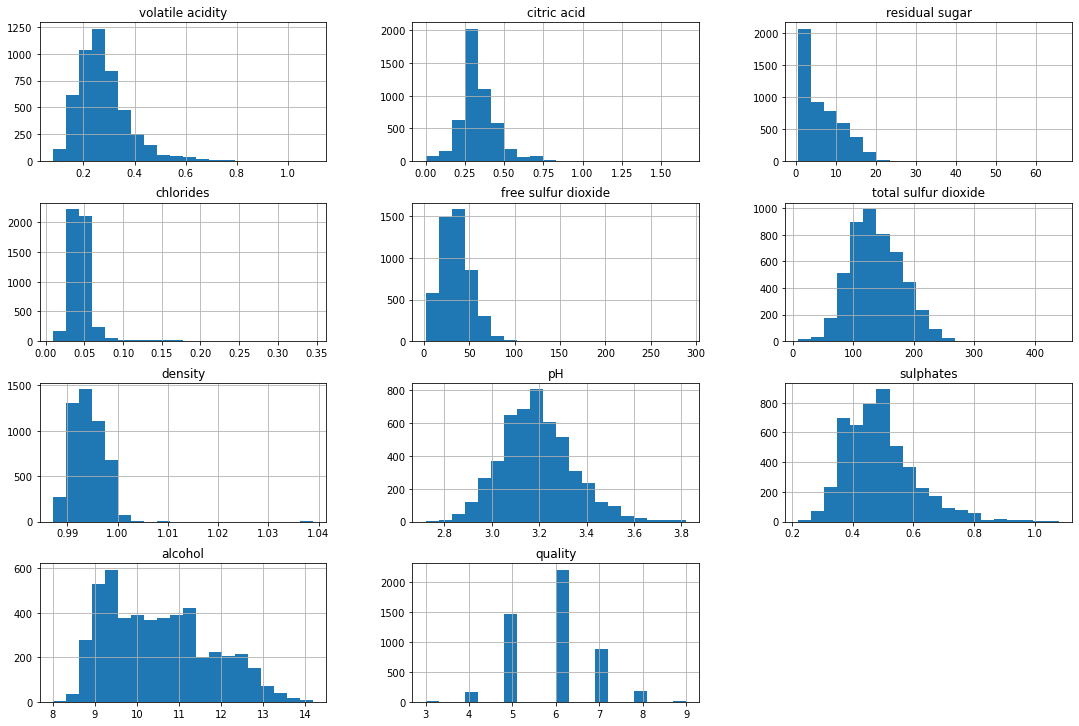

In [47]:
winequality_csv.hist(bins=20)
pl.gcf().set_size_inches(18.5, 12.5)
pl.show()

We merken dat ongeveer de helft van onze observaties een kwaliteitsscore van 6 heeft en dat er ook nog veel observaties zijn met een score van 5 of 7. Verder merken we ook dat de waarden bij de features "chlorides" en "density" ook dicht bij mekaar liggen.

In [25]:
corr = winequality_csv.corr()

In [60]:
corr["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

We merken dat er een groot verband is tussen de hoeveelheid alcohol die de wijn behad en de kwaliteitsscore die de wijn dan uiteindelijk krijgt. We zien dat er ook grote negatieve correlaties zijn tussen quality met density, chlorides, volatile acidity   en total sulfur dioxide. We gaan elk verband in detail bekijken.

Text(0.42500000000000426, 0.5, 'Alcohol')

<Figure size 576x360 with 0 Axes>

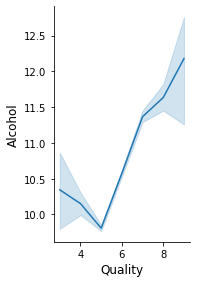

In [49]:
pl.figure(figsize = (8,5))
sns.relplot(data=winequality_csv, x="quality", y="alcohol",kind="line", height=4, aspect=.7)
pl.xlabel("Quality", size=12)
pl.ylabel("Alcohol", size=12)

Text(-5.949999999999996, 0.5, 'Density')

<Figure size 576x360 with 0 Axes>

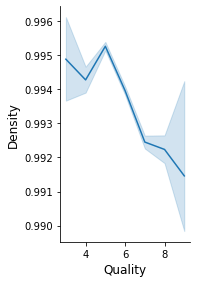

In [50]:
pl.figure(figsize = (8,5))
sns.relplot(data=winequality_csv, x="quality", y="density",kind="line", height=4, aspect=.7)
pl.xlabel("Quality", size=12)
pl.ylabel("Density", size=12)

Text(0.42500000000000426, 0.5, 'Volatile acidity ')

<Figure size 576x360 with 0 Axes>

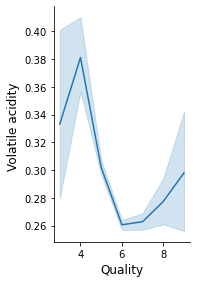

In [61]:
pl.figure(figsize = (8,5))
sns.relplot(data=winequality_csv, x="quality", y="volatile acidity",kind="line", height=4, aspect=.7)
pl.xlabel("Quality", size=12)
pl.ylabel("Volatile acidity ", size=12)

Text(3.6750000000000043, 0.5, 'Total sulfur dioxide')

<Figure size 576x360 with 0 Axes>

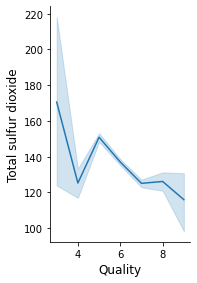

In [58]:
pl.figure(figsize = (8,5))
sns.relplot(data=winequality_csv, x="quality", y="total sulfur dioxide",kind="line", height=4, aspect=.7)
pl.xlabel("Quality", size=12)
pl.ylabel("Total sulfur dioxide", size=12)

Text(0.42500000000000426, 0.5, 'Chlorides')

<Figure size 576x360 with 0 Axes>

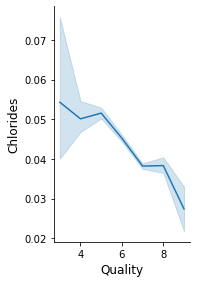

In [59]:
pl.figure(figsize = (8,5))
sns.relplot(data=winequality_csv, x="quality", y="chlorides",kind="line", height=4, aspect=.7)
pl.xlabel("Quality", size=12)
pl.ylabel("Chlorides", size=12)

#### Ondervindingen

- Een hogere alcohol waarde resulteert vaak in een hogere kwaliteitsscore
- Een lagere density resulteert vaak in een hogere kwaliteitsscore
- Hoge volatile acidity resulteert vaak in een lage kwaliteitsscore
- Lage waarden voor total sulfur dioxide resulteert vaak in een hoge kwaliteitsscore
- Hoe lager het aantal chlorides, hoe hoger de kwaliteitsscore wordt
